In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statistics
import os

In [5]:
data_conso = pd.read_csv("/home/loick/conso_quot_moy.csv")
data_conso

Date  conso_moy_quot_MW_PCS0C
0     01/01/18               68634.8750
1     01/02/18               75736.4583
2     01/03/18               72138.6250
3     01/04/18               69112.3333
4     01/05/18               71145.0833
...        ...                      ...
1607  05/27/22               22828.5833
1608  05/28/22               21657.7500
1609  05/29/22               22474.0000
1610  05/30/22               30276.4167
1611  05/31/22               30568.2917

[1612 rows x 2 columns]

## Centrer et réduire les données de consommation

In [7]:
moy_conso = statistics.mean(data_conso['conso_moy_quot_MW_PCS0C'])
moy_conso

54021.05356246898

In [8]:
ecart_type_conso = statistics.stdev(data_conso['conso_moy_quot_MW_PCS0C'])
ecart_type_conso

26874.278934289134

In [21]:
data_conso_standardized = (data_conso['conso_moy_quot_MW_PCS0C'] - moy_conso) / ecart_type_conso
data_conso_standardized

0       0.543785
1       0.808037
2       0.674160
3       0.561551
4       0.637190
          ...   
1607   -1.160681
1608   -1.204248
1609   -1.173875
1610   -0.883545
1611   -0.872684
Name: conso_moy_quot_MW_PCS0C, Length: 1612, dtype: float64

## Importer les données de quantité injectée

In [27]:
data_inj = pd.read_csv('/home/loick/qte_inj_quot.csv')
data_inj

journee_gaziere  qte_injectee_Mwh
0         2018-01-01          1057.641
1         2018-01-02          1028.290
2         2018-01-03           953.233
3         2018-01-04          1045.069
4         2018-01-05          1071.463
...              ...               ...
1607      2022-05-27         14436.986
1608      2022-05-28         13768.582
1609      2022-05-29         13566.733
1610      2022-05-30         13867.608
1611      2022-05-31         14087.681

[1612 rows x 2 columns]

## Visualiser les données d'injection

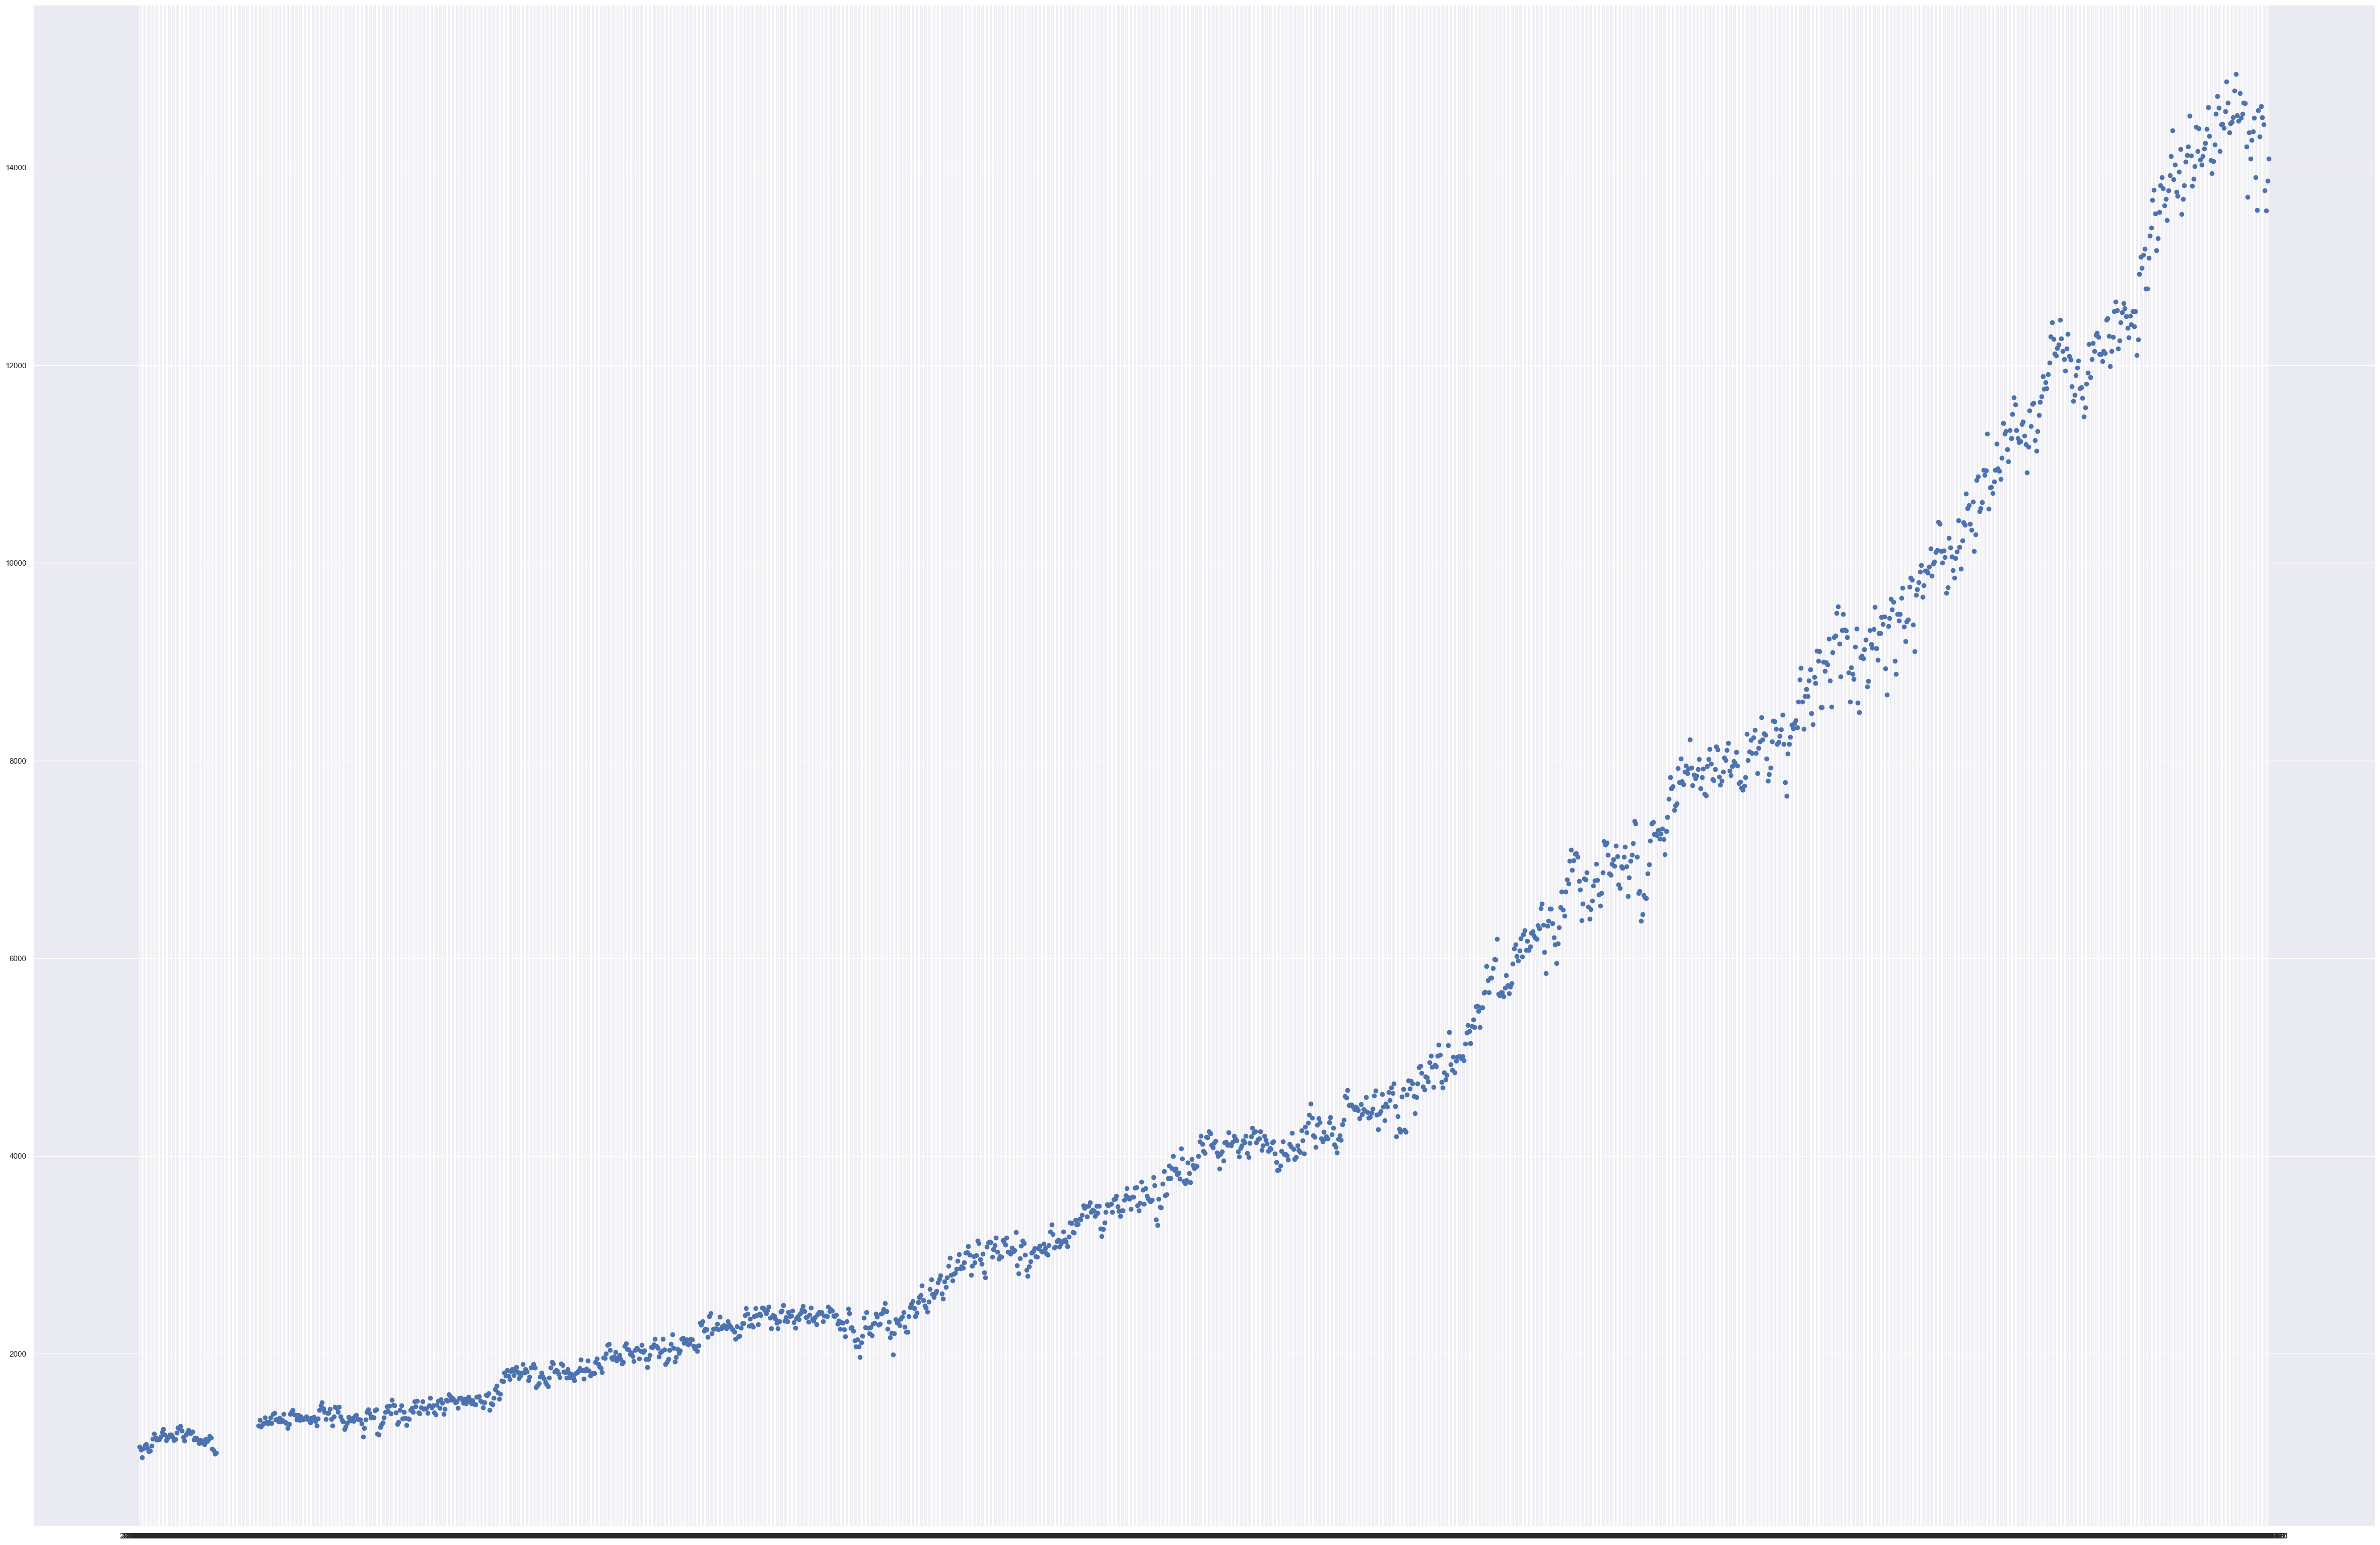

In [62]:
x = data_inj['journee_gaziere']
y = data_inj['qte_injectee_Mwh']
plt.scatter(x,y)
plt.rcParams.update({'figure.figsize':(60,40), 'figure.dpi':100})
plt.show()

## Les données d'injection décrivent une forme exponentielle : on peut utiliser cette forme pour en déduire les données manquantes au mois de Mars 2018

## Afin de calculer l'équation de la courbe, on sélectionne les données après Mars 2018, et on linéarise afin d'appliquer la méthode des moindres carrés et ainsi calculer les paramètres de l'équation.

## L'équation de départ du modèle est : quantité_injectée = b*e^(a*x) qui se linéarise en : ln(b) + a*x ; on cherche a et b

In [64]:
qte_reg = pd.read_csv("/home/loick/qte_reg.csv")
qte_reg

date   ln(qte)  qte_injectee_Mwh
0      1.0  7.146369          1269.488
1      2.0  7.190366          1326.588
2      3.0  7.140853          1262.505
3      4.0  7.156860          1282.877
4      5.0  7.166316          1295.065
...    ...       ...               ...
1607   NaN       NaN         14436.986
1608   NaN       NaN         13768.582
1609   NaN       NaN         13566.733
1610   NaN       NaN         13867.608
1611   NaN       NaN         14087.681

[1612 rows x 3 columns]

## On a calculé le ln des quantités et on a transformé les dates en série de nombres incrémentés en 1

In [45]:
x1 = qte_reg['date']
y = qte_reg['ln(qte)']

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln(qte)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.352e+05
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:20:25   Log-Likelihood:                 2148.6
No. Observations:                1522   AIC:                            -4293.
Df Residuals:                    1520   BIC:                            -4283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0824      0.003   2339.891      0.000       7.076       7.088
date           0.0017   3.44e-06    485.005      0.000       0.002       0.002
==============================================================================
Omnibus:                      126.808   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.792
Skew:                          -0.681   Prob(JB):                     3.01e-38
Kurtosis:                       3.933   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## La régression est optimale : le R² est très significatif et les coefficients sont tous significatifs à 95% ; le tableau des résultats nous fournit les valeurs de a et de b
## La régression est illustrée ci-dessous

## ici, a = 0.0017 et ln(b) = 7.0824 soit b = 1190.82

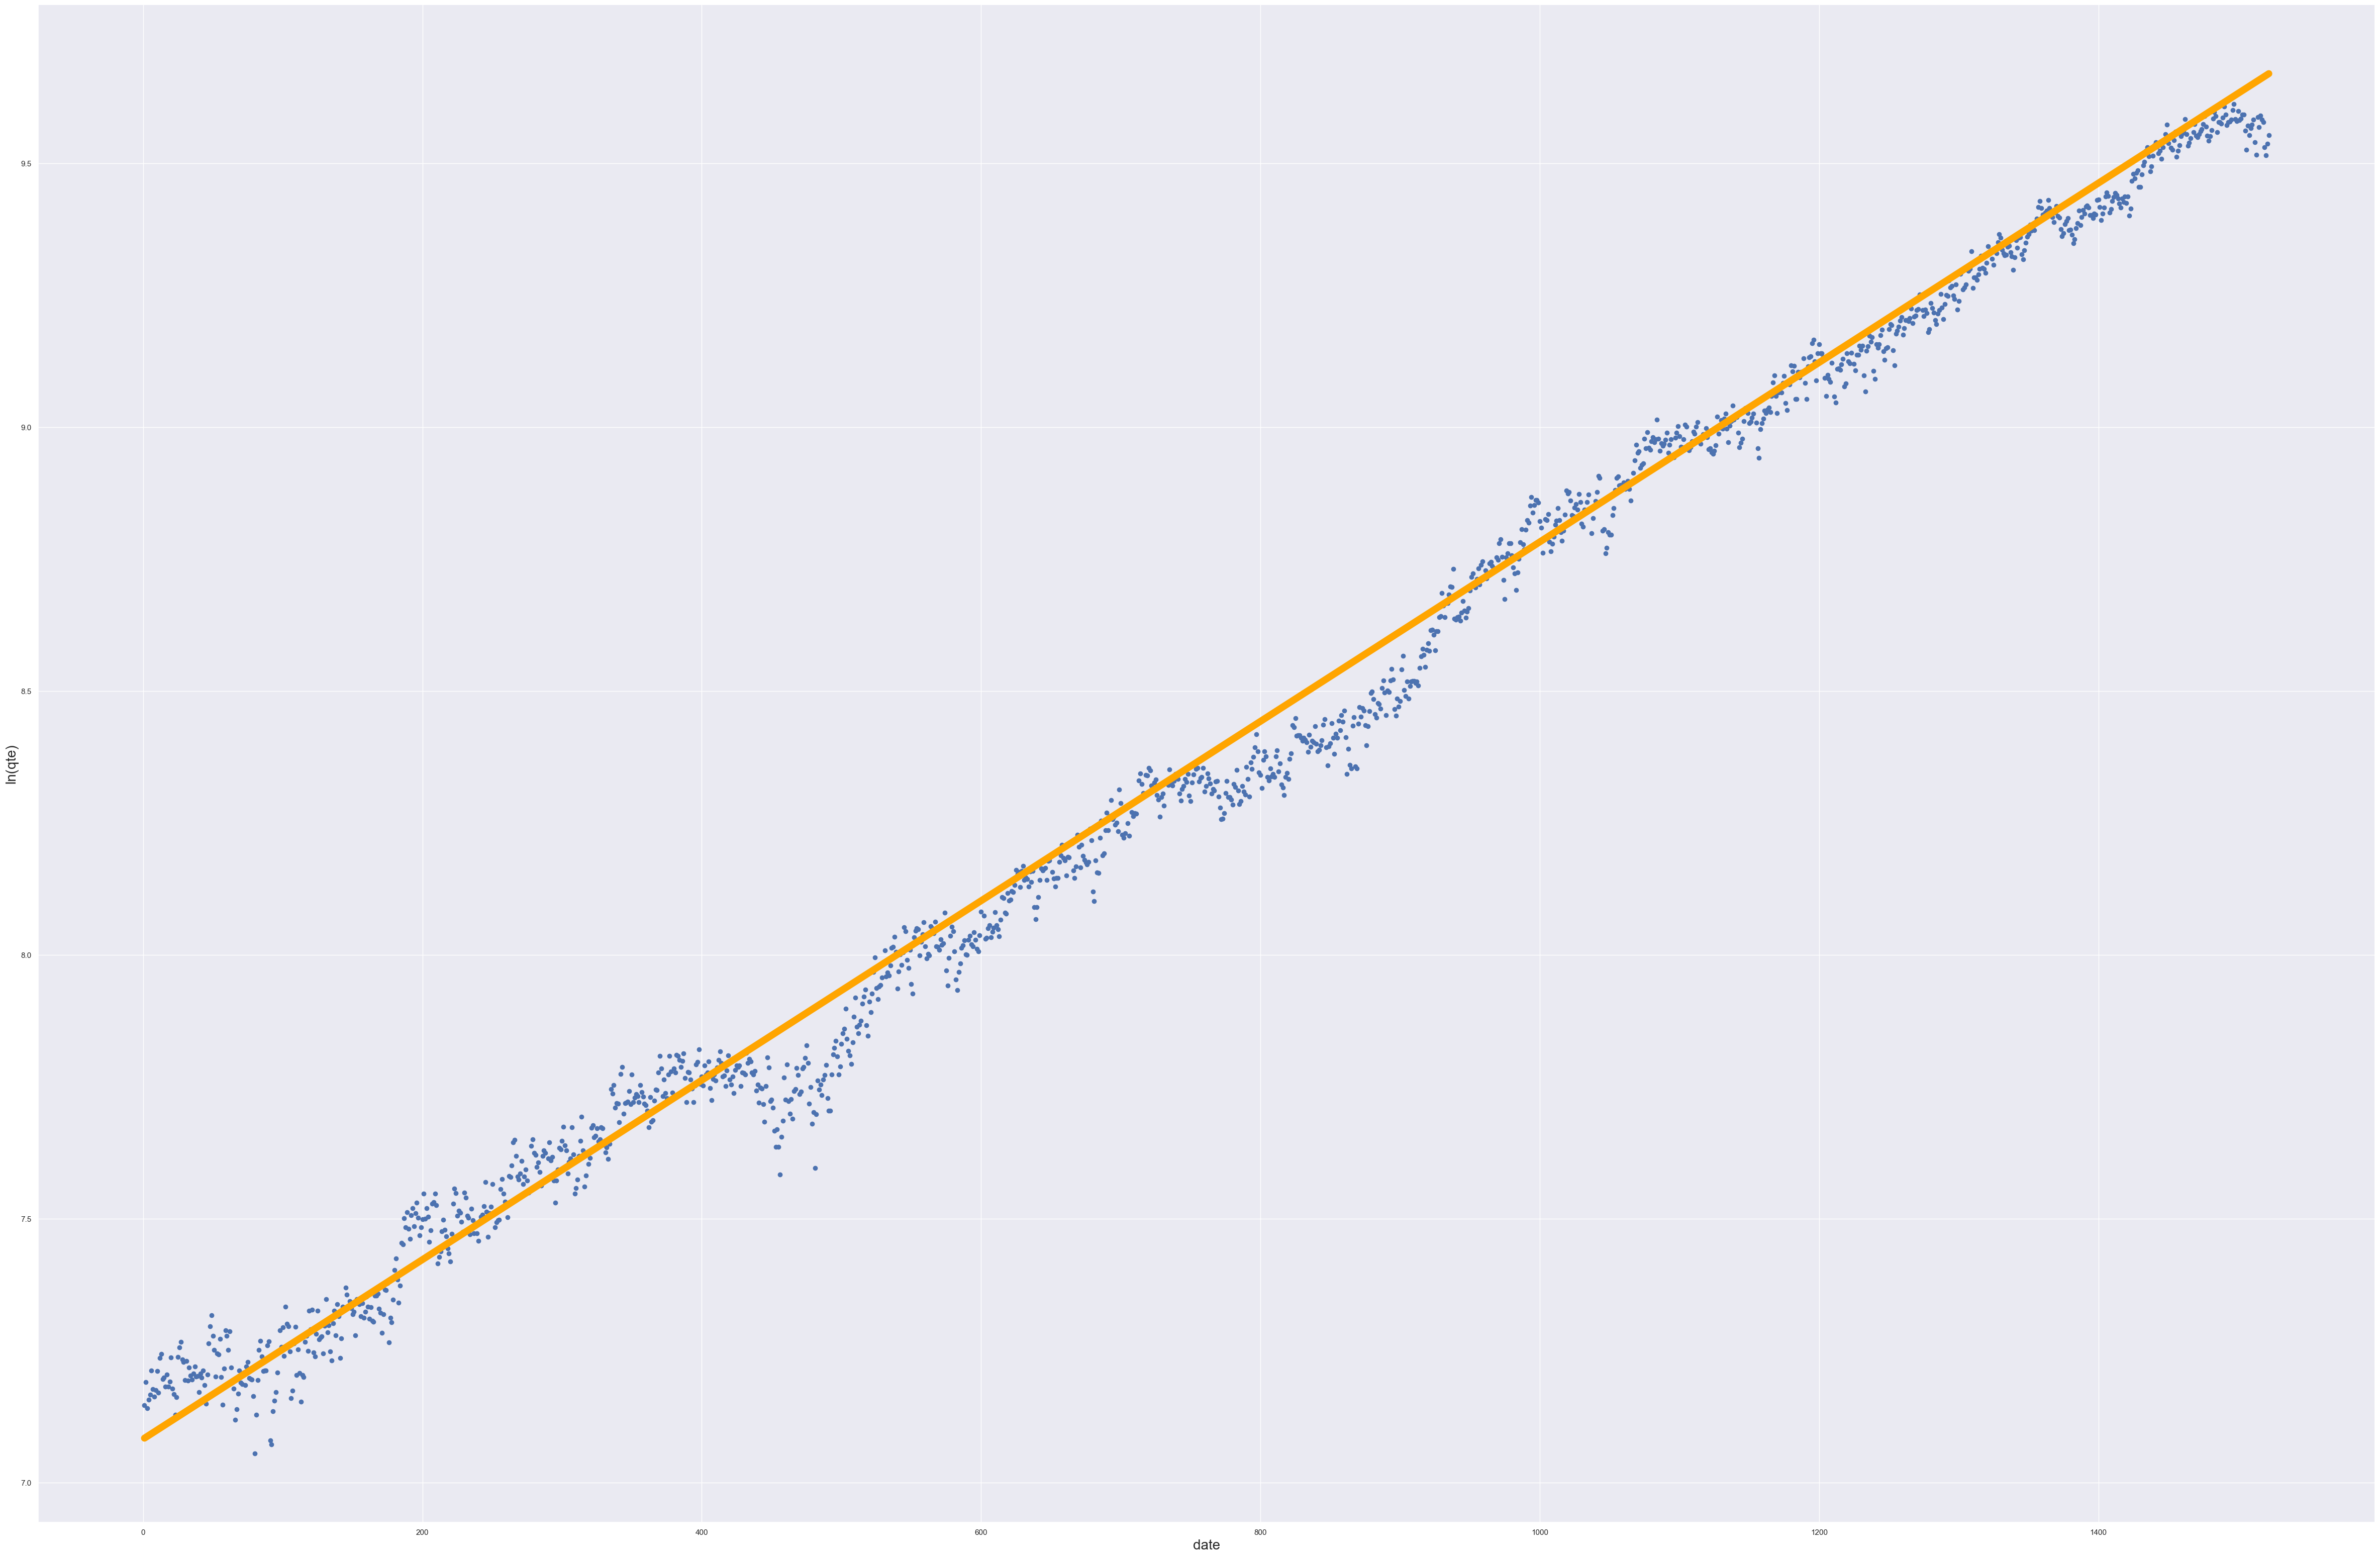

In [53]:
yhat = 0.0017*x1 + 7.0824
x1 = qte_reg['date']
y = qte_reg['ln(qte)']
plt.scatter(x1,y)
plt.xlabel('date', fontsize = 20)
plt.ylabel('ln(qte)', fontsize = 20)
fig = plt.plot(x1,yhat, lw=10, c='orange', label ='regression line')

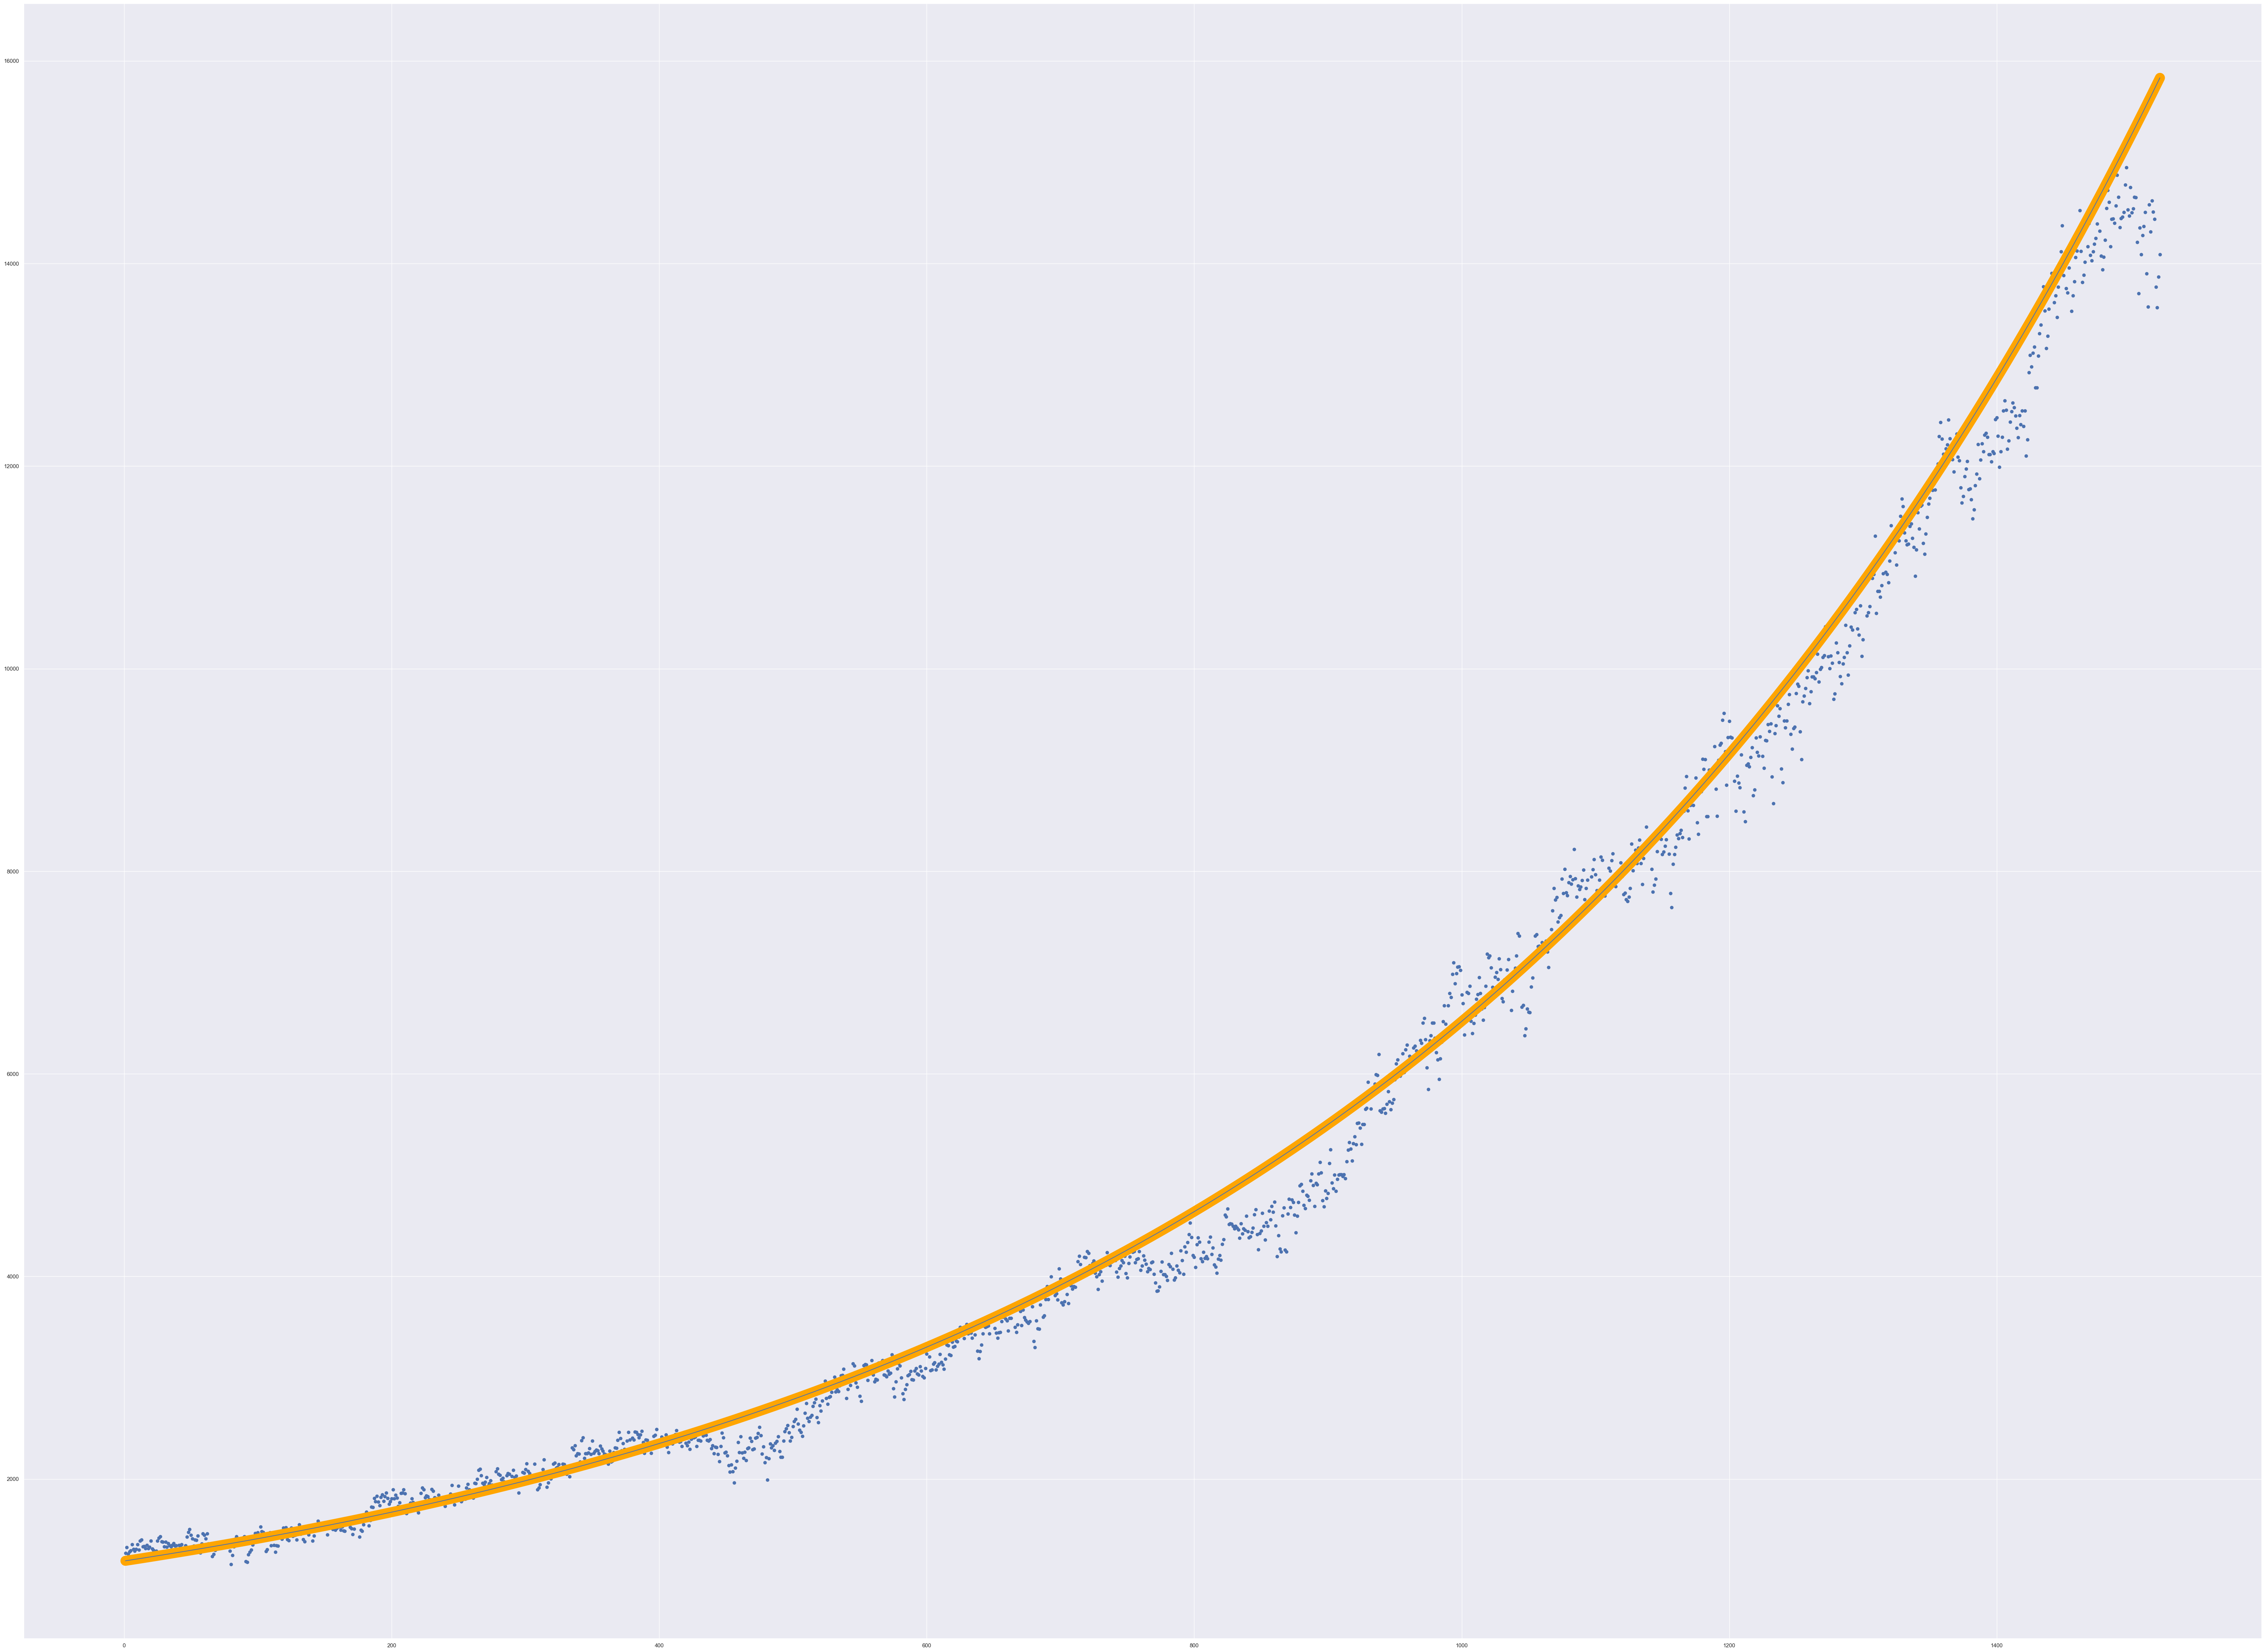

In [89]:
x2 = qte_reg['date']
y = qte_reg['qte_injectee_Mwh']
f=1190.82*(np.exp(0.0017*x2))
plt.scatter(x2,y)
fig = plt.plot(x2,f, lw=20, c='orange', label ='regression line')
plt.plot(x2,f)

## On a illustré les données originales ainsi que l'équation de forme exponentielle obtenue à partir de la régression

## Une fois l'équation exponentielle obtenue, on calcule les données manquantes (travail sous excel)
## Par exemple, pour obtenir la valeur au 01/03/2018, on a calculé : 1190.82*e^(0.0017 * 60)
## 60 étant ici l'index sous excel qui correspond au premier Mars, l'index initial étant 2, et désigne le 01/01/2018

## On standardise ensuite les données d'injection 

In [90]:
moy_inj = statistics.mean(data_inj['qte_injectee_Mwh'])
moy_inj

5268.590776923077

In [91]:
ecart_type_inj = statistics.stdev(data_inj['qte_injectee_Mwh'])
ecart_type_inj

3913.8430254925065

In [92]:
data_inj_standardized = (data_inj['qte_injectee_Mwh'] - moy_inj) / ecart_type_inj
data_inj_standardized

0      -1.075912
1      -1.083411
2      -1.102588
3      -1.079124
4      -1.072380
          ...   
1607    2.342556
1608    2.171776
1609    2.120203
1610    2.197078
1611    2.253307
Name: qte_injectee_Mwh, Length: 1612, dtype: float64

In [95]:
data_inj['data_inj_st'] = data_inj_standardized
data_inj

journee_gaziere  qte_injectee_Mwh  data_inj_st
0         2018-01-01          1057.641    -1.075912
1         2018-01-02          1028.290    -1.083411
2         2018-01-03           953.233    -1.102588
3         2018-01-04          1045.069    -1.079124
4         2018-01-05          1071.463    -1.072380
...              ...               ...          ...
1607      2022-05-27         14436.986     2.342556
1608      2022-05-28         13768.582     2.171776
1609      2022-05-29         13566.733     2.120203
1610      2022-05-30         13867.608     2.197078
1611      2022-05-31         14087.681     2.253307

[1612 rows x 3 columns]

In [24]:
data_conso['data_conso_st'] = data_conso_standardized

In [94]:
data_conso

Date  conso_moy_quot_MW_PCS0C  data_conso_st
0     01/01/18               68634.8750       0.543785
1     01/02/18               75736.4583       0.808037
2     01/03/18               72138.6250       0.674160
3     01/04/18               69112.3333       0.561551
4     01/05/18               71145.0833       0.637190
...        ...                      ...            ...
1607  05/27/22               22828.5833      -1.160681
1608  05/28/22               21657.7500      -1.204248
1609  05/29/22               22474.0000      -1.173875
1610  05/30/22               30276.4167      -0.883545
1611  05/31/22               30568.2917      -0.872684

[1612 rows x 3 columns]

In [96]:
data_inj = pd.read_csv('/home/loick/qte_inj_quot.csv')
data_inj

journee_gaziere  qte_injectee_Mwh  data_inj_st
0         2018-01-01          1057.641    -1.075912
1         2018-01-02          1028.290    -1.083411
2         2018-01-03           953.233    -1.102588
3         2018-01-04          1045.069    -1.079124
4         2018-01-05          1071.463    -1.072380
...              ...               ...          ...
1607      2022-05-27         14436.986     2.342556
1608      2022-05-28         13768.582     2.171776
1609      2022-05-29         13566.733     2.120203
1610      2022-05-30         13867.608     2.197078
1611      2022-05-31         14087.681     2.253307

[1612 rows x 3 columns]

## Voici le graphe des données concernant les quantités injectées, reconstruites à partir de notre régression

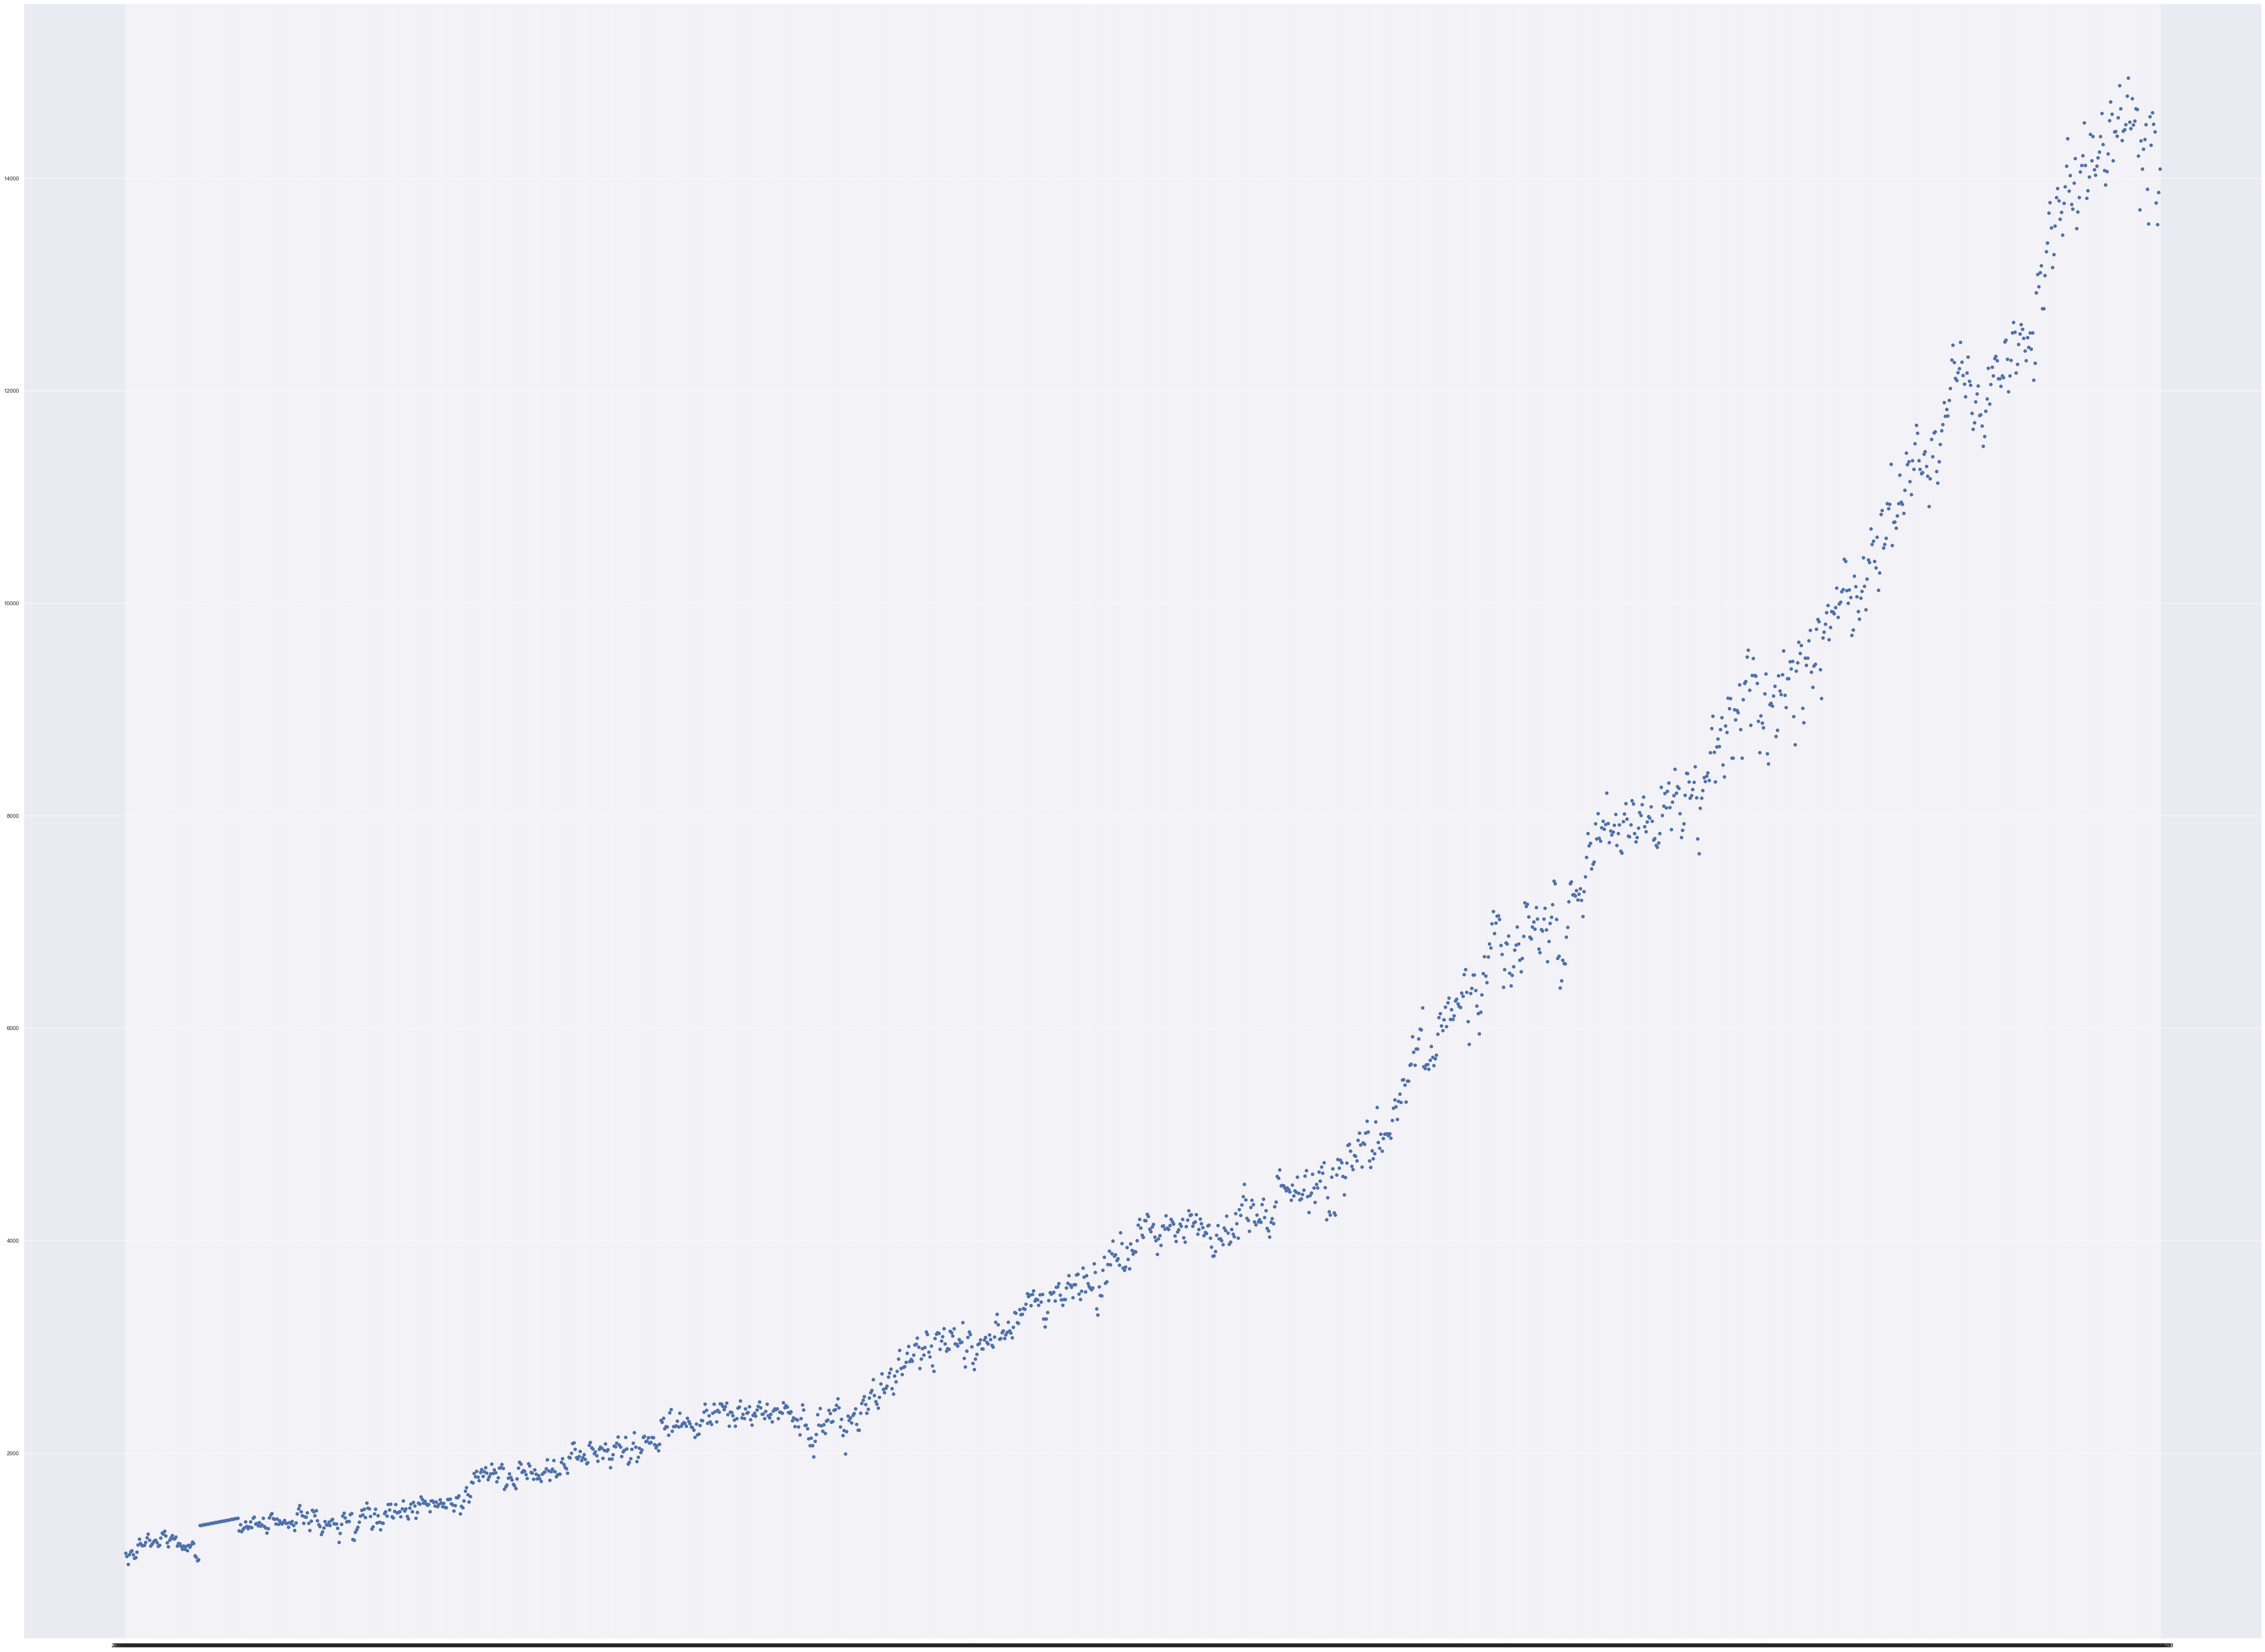

In [97]:
x = data_inj['journee_gaziere']
y = data_inj['qte_injectee_Mwh']
plt.scatter(x,y)
plt.rcParams.update({'figure.figsize':(60,40), 'figure.dpi':100})
plt.show()

## On cherche ensuite à recalculer combien le biogaz couvre les besoins de consommation ; on fait l'hypothèse que les quantités injectées dans le réseau, telles qu'on les a dans nos données, sont en effet utilisées, et on calcule le ratio entre ces injections et les consommations. Les données standardisées nous permettent de visualiser et de comparer ces deux quantités entre elles, indépendamment des unités

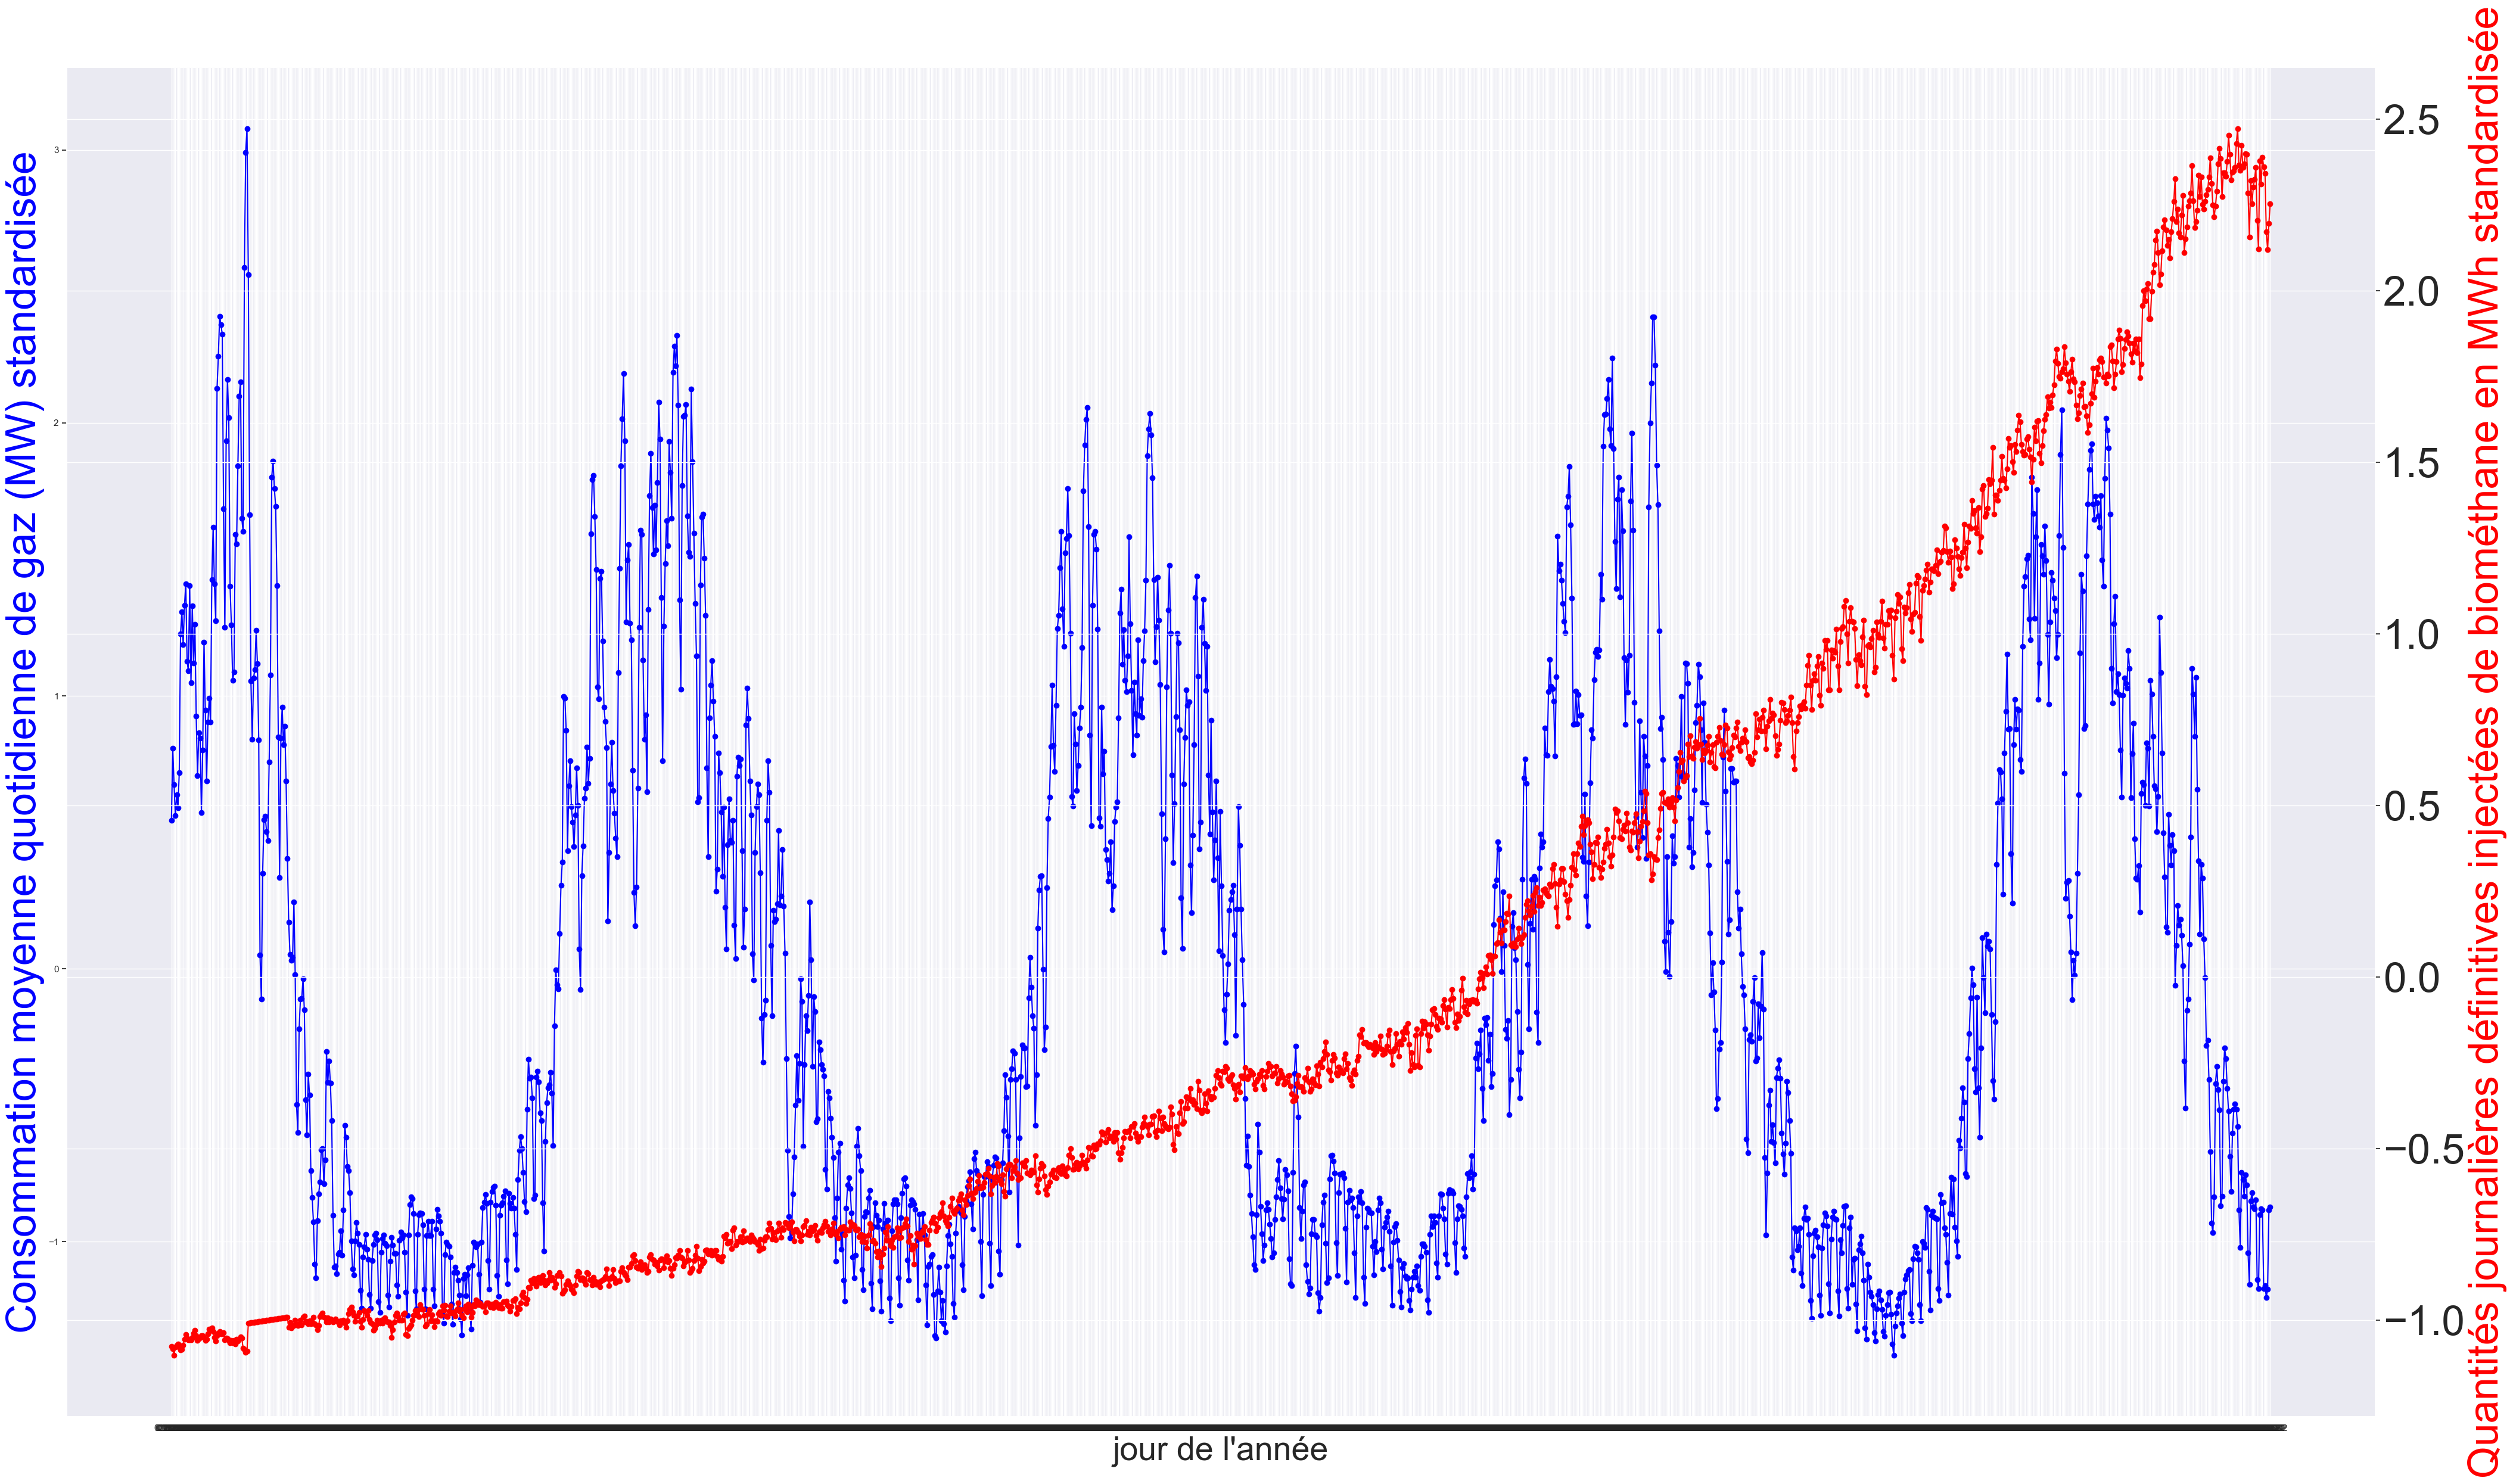

In [77]:
#create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(50,30))
# make a plot
ax.plot(data_conso.Date, data_conso.data_conso_st, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("jour de l'année", fontsize = 40)
# set y-axis label
ax.set_ylabel("Consommation moyenne quotidienne de gaz (MW) standardisée", color="blue", fontsize=50)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
plt.yticks(fontsize=50,)
plt.xticks(fontsize=50,)
ax2.plot(data_conso.Date, data_inj["data_inj_st"],color="red",marker="o")
ax2.set_ylabel("Quantités journalières définitives injectées de biométhane en MWh standardisée",color="red",fontsize=50)
plt.show()

## La consommation est cyclique ; on voit que courant 2022, les quantités injectées de biogas deviennent supérieures à la consommation

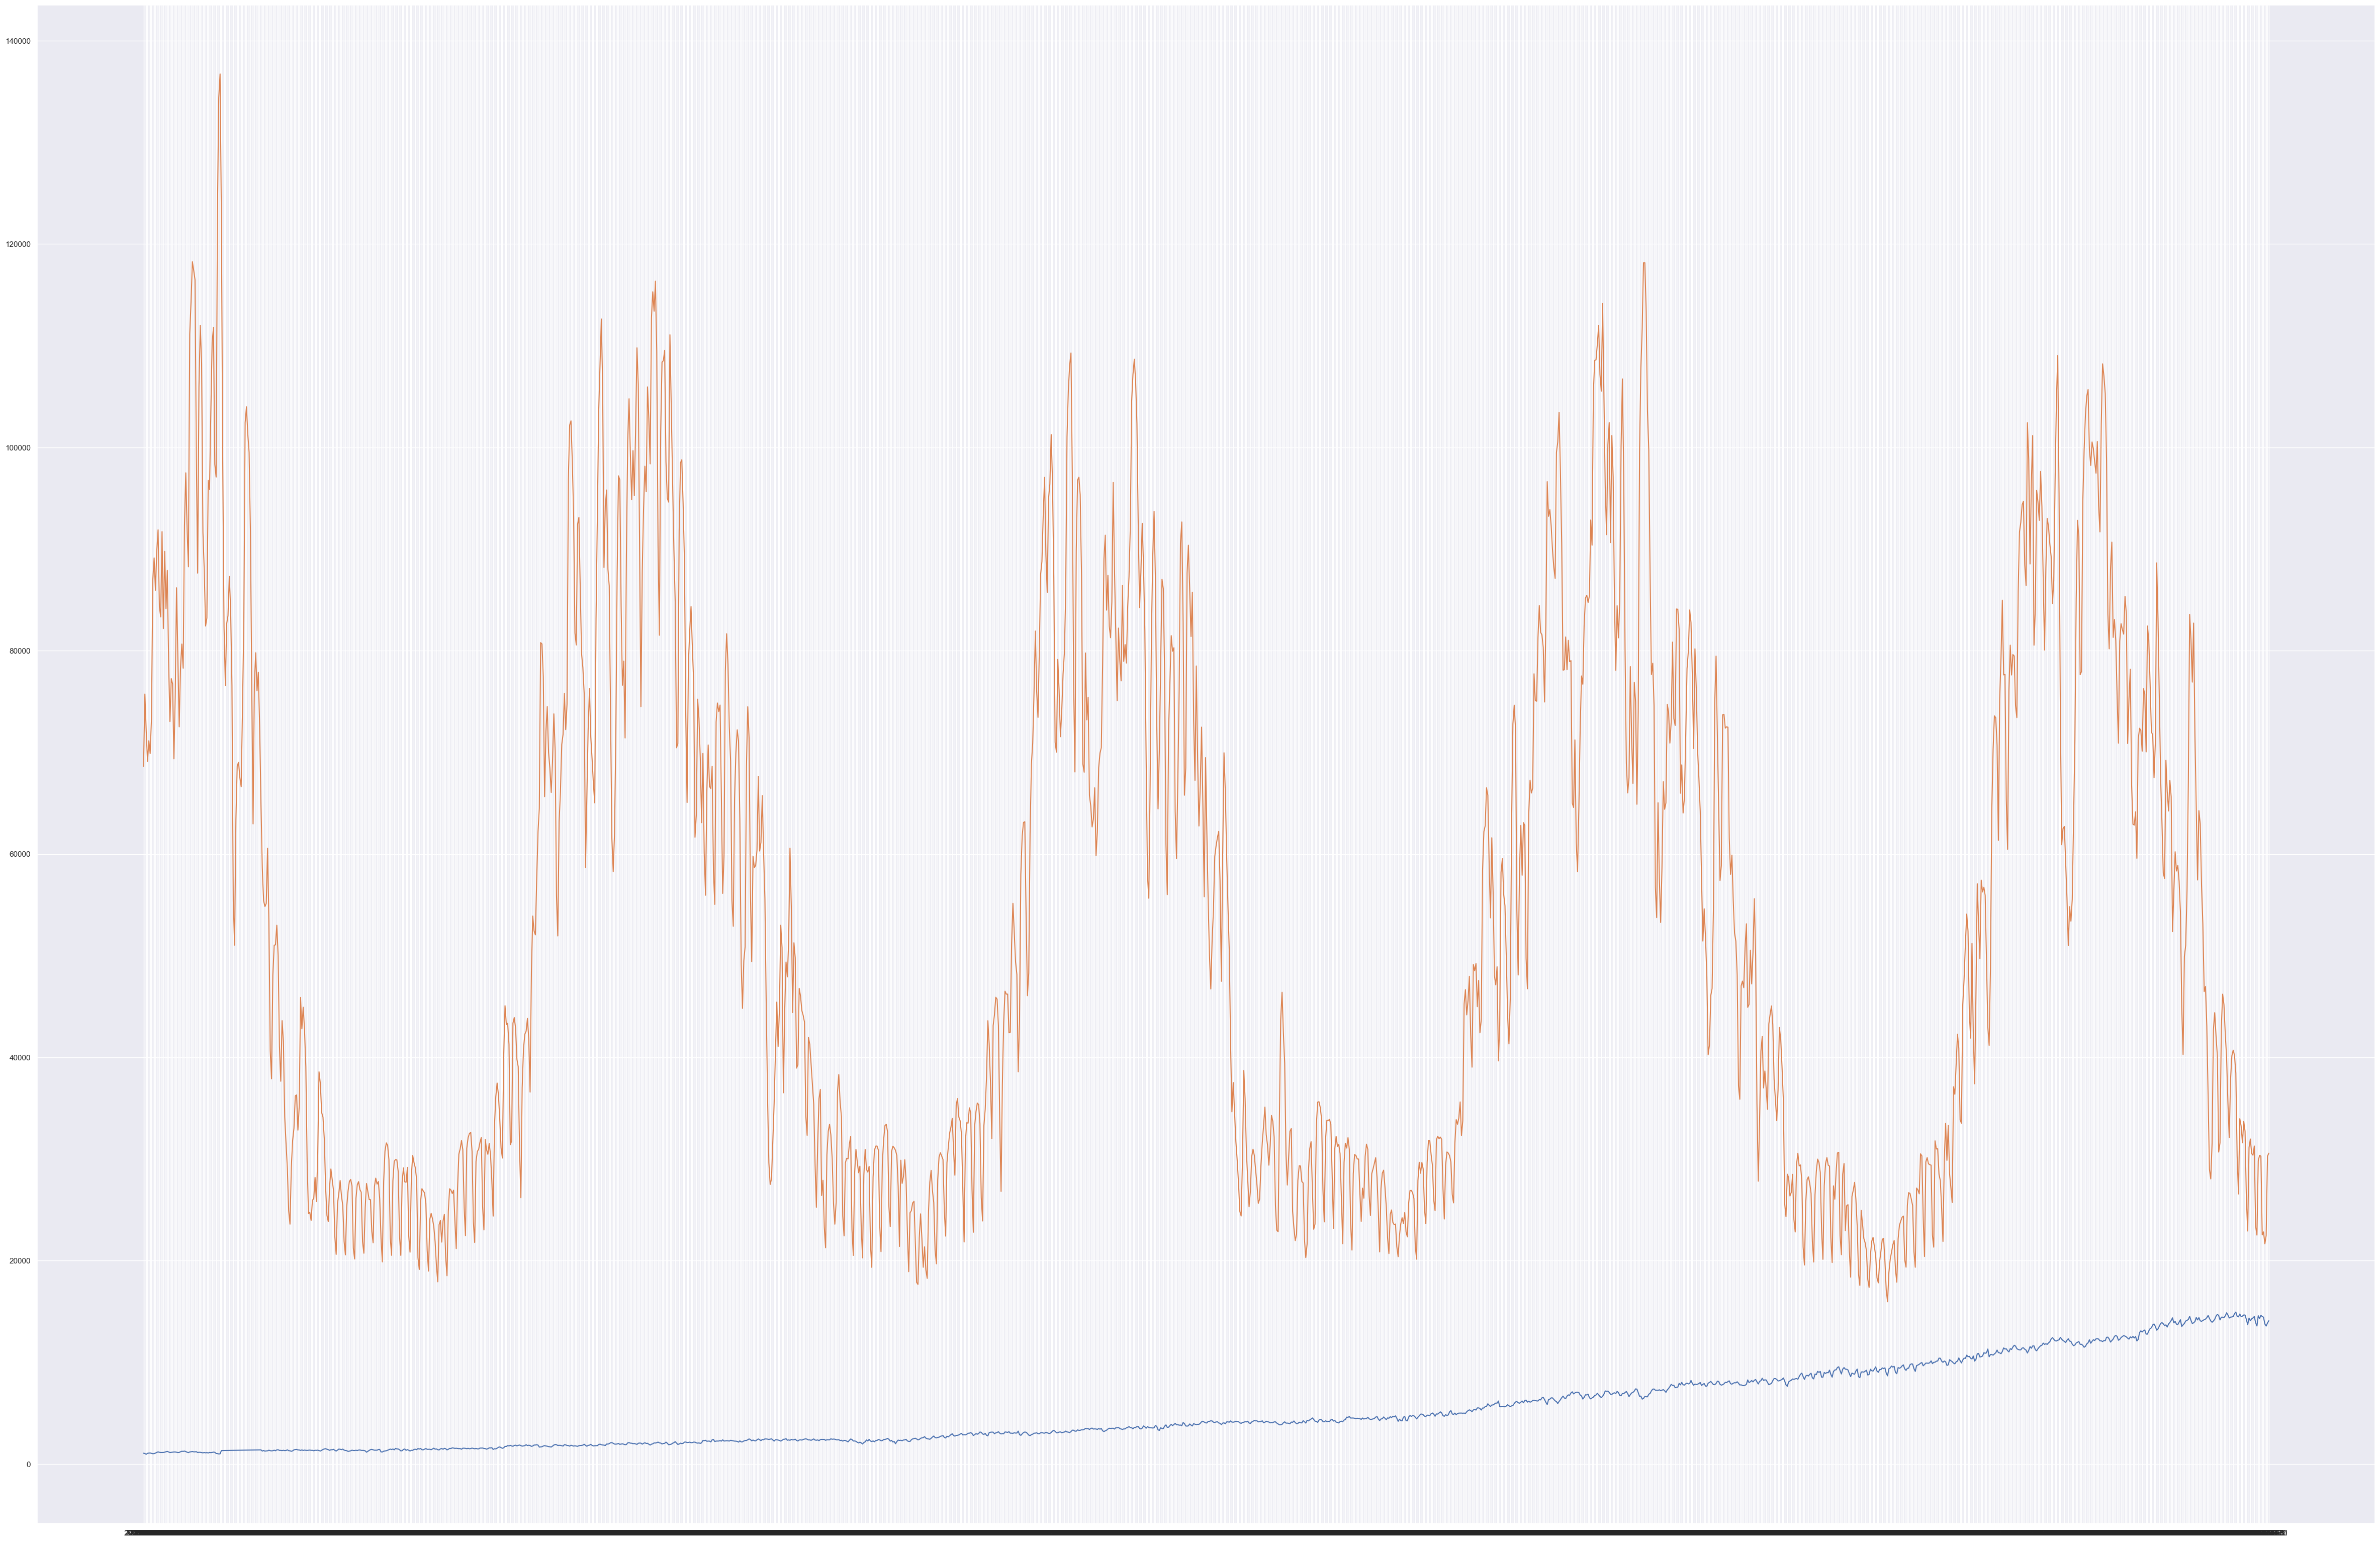

In [102]:
fig, ax = plt.subplots()
x4 = data_inj['journee_gaziere']
y4 = data_inj['qte_injectee_Mwh']
y5 = data_conso['conso_moy_quot_MW_PCS0C']
ax.plot(x4, y4)
ax.plot(x4, y5)
plt.show()

In [166]:
IRG = data_conso['conso_moy_quot_MW_PCS0C'] - data_inj['qte_injectee_Mwh']
len(IRG)

1612

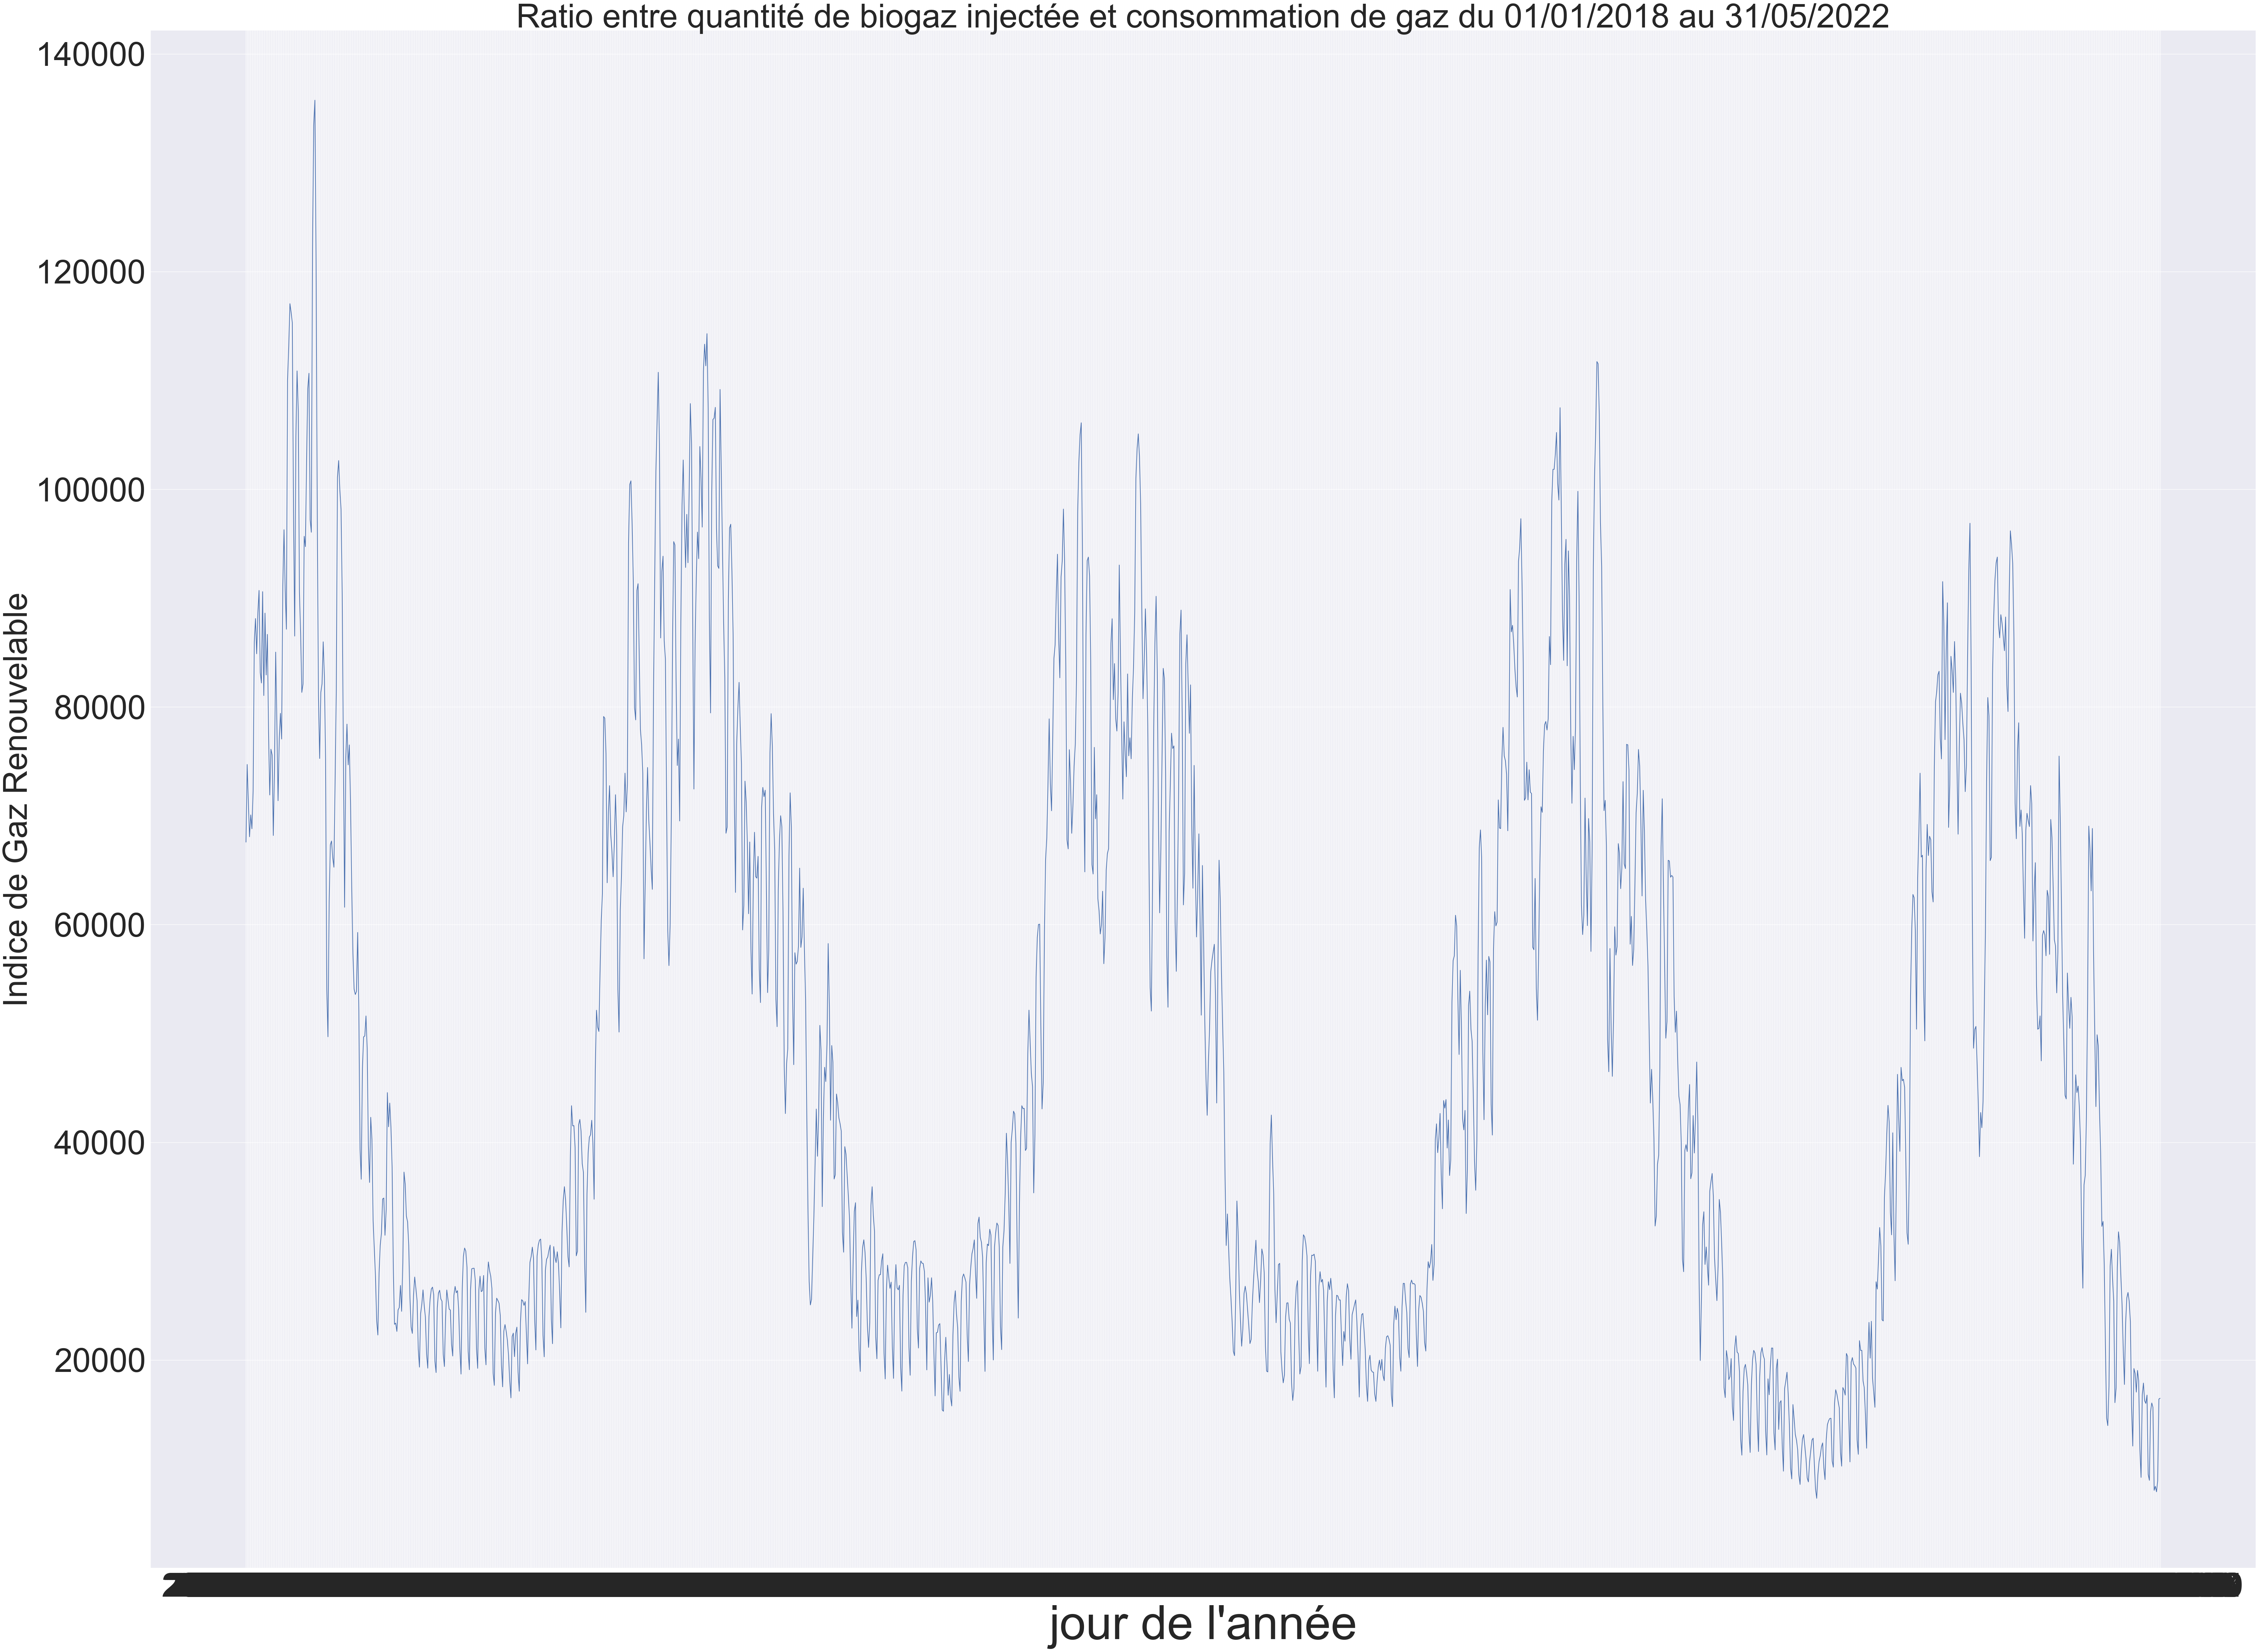

In [109]:
x=data_inj.journee_gaziere
y=IRG
plt.plot(x,y)
plt.rcParams["figure.figsize"] = (80,60)
plt.xlabel("jour de l'année",fontsize=100)
plt.ylabel('Indice de Gaz Renouvelable',fontsize=70)
plt.yticks(fontsize=70,)
plt.xticks(fontsize=70,)
plt.title("Ratio entre quantité de biogaz injectée et consommation de gaz du 01/01/2018 au 31/05/2022",fontsize=70)
plt.show()

## Prospective : en quelle année peut-on espérer, à ce rythme, couvrir entièrement les besoins de consommation par le biogaz ? On calcule pour le savoir le trend de la courbe ci-dessus, et on résout l'équation : trend = 0 [c'est-à-dire lorsque consommation = production]

In [167]:
datum = np.float_(list(range(1612)))
len(datum)

1612

In [168]:
x2 = datum
y4 = IRG

x = sm.add_constant(x2)

results = sm.OLS(y4,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     36.24
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.15e-09
Time:                        20:44:53   Log-Likelihood:                -18717.
No. Observations:                1612   AIC:                         3.744e+04
Df Residuals:                    1610   BIC:                         3.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.568e+04   1329.880     41.872      0.000    5.31e+04    5.83e+04
x1            -8.6063      1.430     -6.020      0.000     -11.410      -5.802
==============================================================================
Omnibus:                      388.688   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.972
Skew:                           0.470   Prob(JB):                     7.29e-28
Kurtosis:                       2.011   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

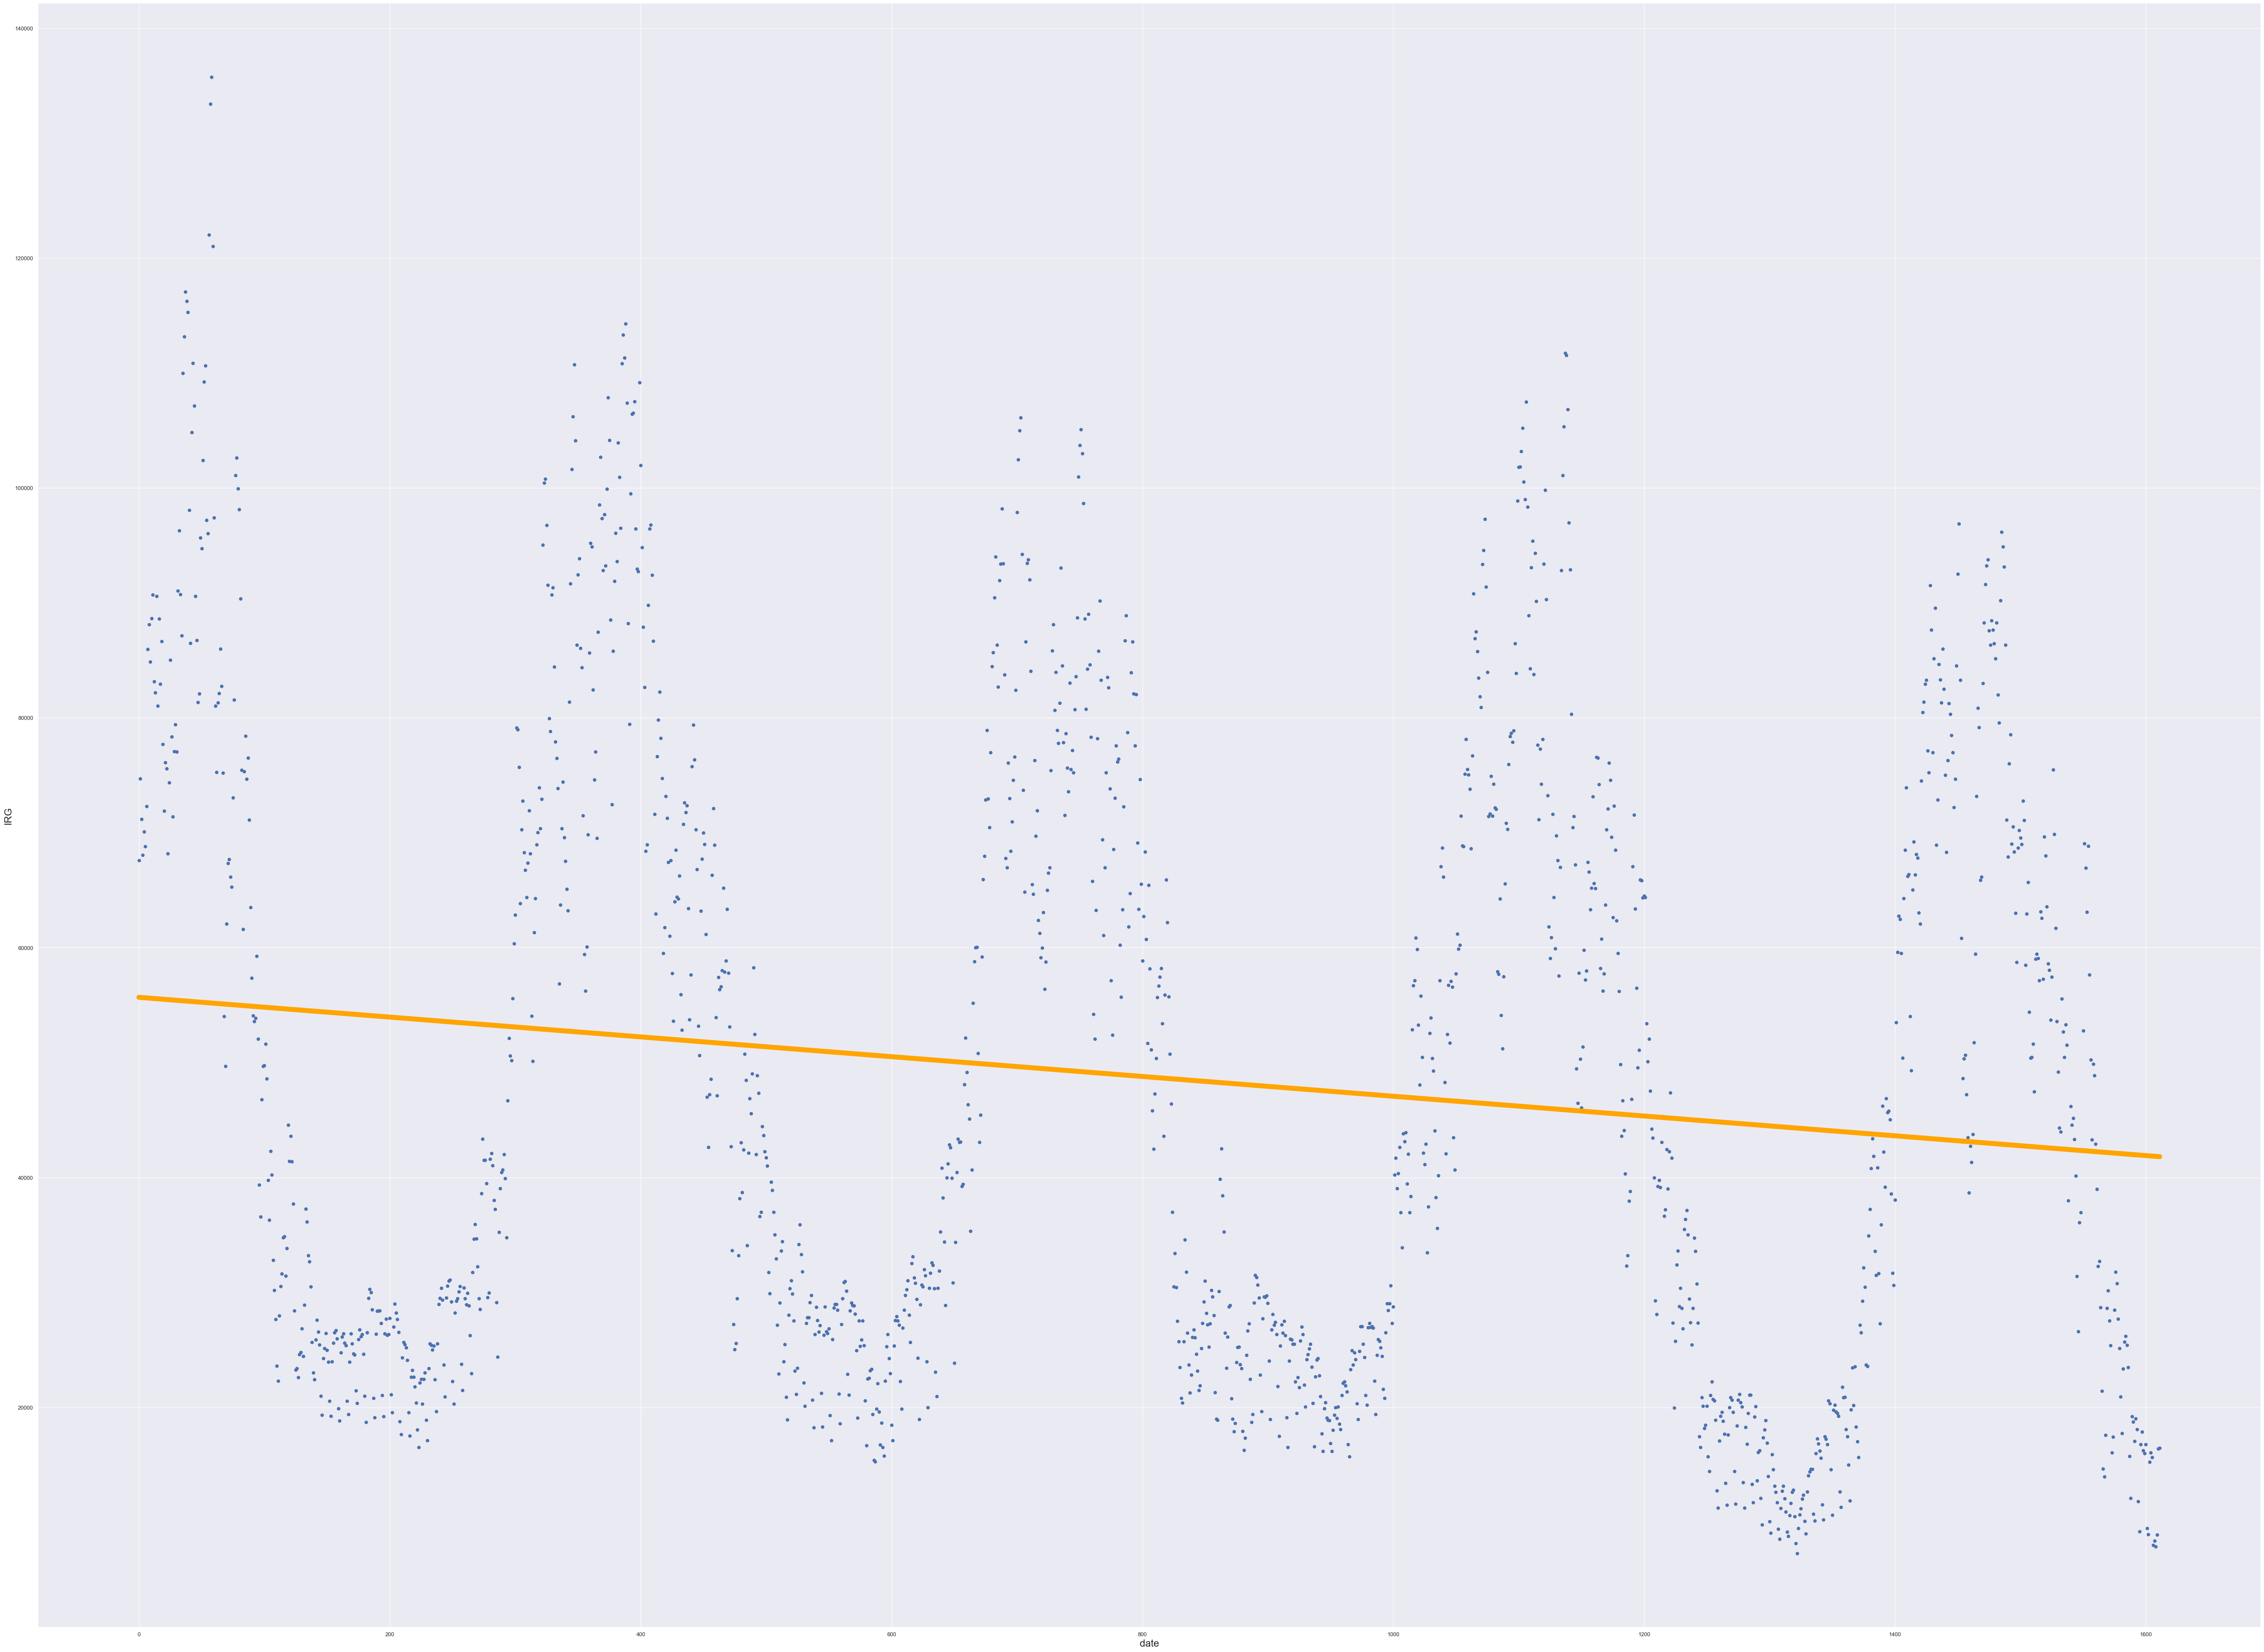

In [171]:
x1 = datum
y = IRG
yhat = -8.6063*x1 + 55680
plt.scatter(x1,y)
plt.xlabel('date', fontsize = 20)
plt.ylabel('IRG', fontsize = 20)
fig = plt.plot(x1,yhat, lw=10, c='orange', label ='regression line')

## On résout l'équation de trend :  -8.6063*x1 + 55680 = 0

In [172]:
55680/8.6063

6469.679188501447

## Pour le 01/01/2018 qui démarre à un index de 1, on peut obtenir l'année correspondante pour l'index 6450.

# On obtient ainsi la date à laquelle le biogaz est censé, si on conserve le même rythme de production, couvrir tous les besoins de consommation en gaz naturel actuellement importé : 
# 09/18/35 : le 18 Septembre 2035
# J'aurai 38 ans !